Breast Cancer Prediction using Machine Learning

Introduction

Breast cancer is one of the most common diseases affecting women worldwide. Early detection of breast cancer significantly increases the chances of successful treatment.
In this project, machine learning techniques are used to predict whether a breast tumor is benign or malignant based on medical diagnostic features.

The objective of this project is to build a reliable binary classification model using Logistic Regression and evaluate its performance.

Importing Required Libraries

In this section, all the necessary Python libraries required for data analysis, visualization, and machine learning are imported.

Data Preprocessing

Data preprocessing is an important step to ensure the quality of the dataset.
In this step:

-Unnecessary columns such as id and Unnamed: 32 are removed

-The target variable diagnosis is encoded into numerical form

-Missing values and duplicate records are checked

This ensures the dataset is clean and ready for model training.

Exploratory Data Analysis (EDA)

Exploratory Data Analysis is performed to better understand the dataset.

-A count plot is used to visualize the distribution of benign and malignant cases

-A correlation heatmap is used to analyze the relationships between different features

EDA helps in understanding the data patterns before applying machine learning models.

Feature Scaling

Feature scaling is applied using StandardScaler to normalize the feature values.
This step is important for algorithms like Logistic Regression, which are sensitive to feature scale.

In [ ]:
Model Training

The dataset is split into training and testing sets.
A Logistic Regression model is trained using the scaled training data.

Logistic Regression is chosen because:

-It works well for binary classification problems

-It is easy to interpret

-It is commonly used in medical prediction tasks

Model Evaluation

The trained model is evaluated using:

-Accuracy score

-Classification report (precision, recall, F1-score)

The results indicate that the model performs well on unseen test data and generalizes effectively.

Conclusion

In this project, a machine learning model was successfully developed to predict breast cancer using diagnostic features.
The Logistic Regression model achieved high accuracy and demonstrated reliable performance.

This project highlights the practical application of machine learning in the healthcare domain and helped in understanding the complete machine learning pipeline from data preprocessing to model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv('Breast_cancer_dataset.csv')
Data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Data['diagnosis'] = encoder.fit_transform(Data['diagnosis'])

In [4]:
Data.drop(columns=['Unnamed: 32','id'], inplace=True)

In [5]:
Data.isnull().sum().sum()

np.int64(0)

In [6]:
Data.duplicated().sum()

np.int64(0)

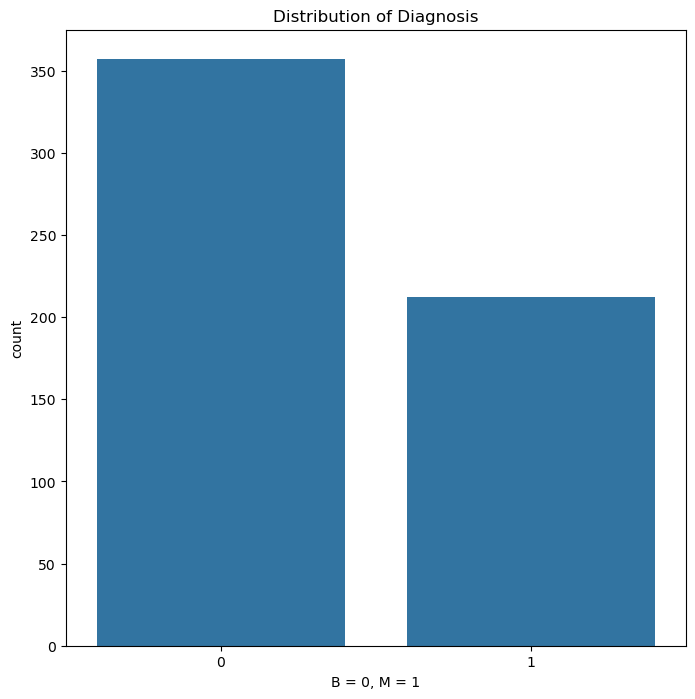

In [7]:
plt.figure(figsize=(8, 8))
sns.countplot(x='diagnosis', data=Data)
plt.title('Distribution of Diagnosis')
plt.xlabel('B = 0, M = 1')
plt.show()
        

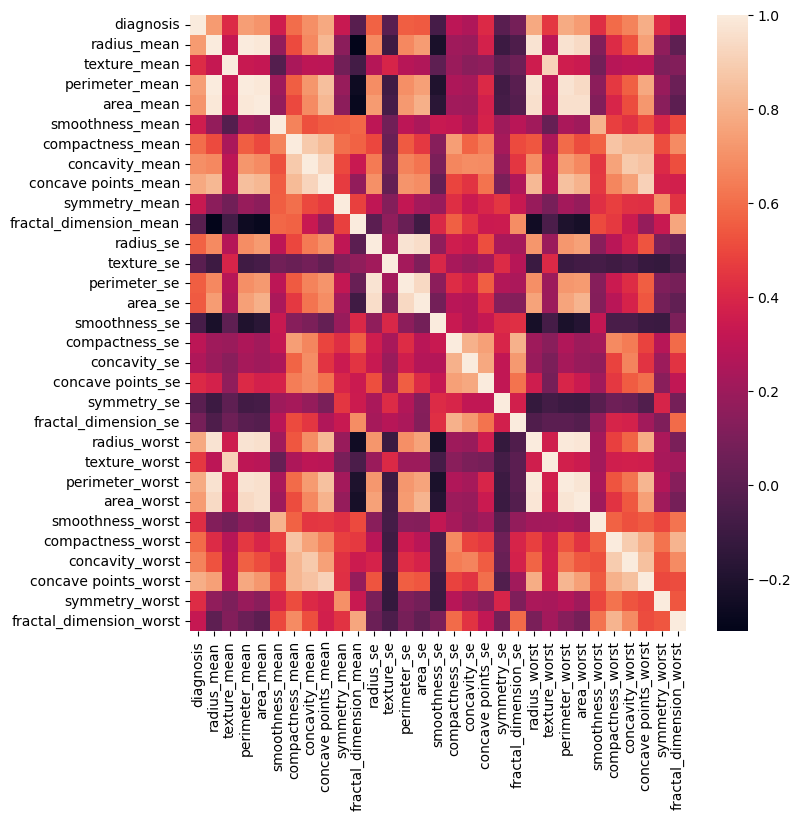

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(Data.corr())
plt.show()

In [18]:
X = Data.drop(columns=['diagnosis'], axis = 1)
y = Data['diagnosis']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression

Model = LogisticRegression()
Model.fit(X_train_scale, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
y_pred = Model.predict(X_test_scale)

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"""The Accuracy: {accuracy*100: .2f}%""")


The Accuracy:  98.25%


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [25]:
print(f"""Train Score: {Model.score(X_train_scale, y_train)*100:.2f}%""")
print(f"""Test Score: {Model.score(X_test_scale, y_test)*100:.2f}%""")

Train Score: 98.74%
Test Score: 98.25%
